#### Import PM2.5 Data and Concatenate to get one file with all PM2.5 Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


bam = pd.read_csv(r'C:\Users\sph0088\OneDrive - UNT System\MORA\Analysis\E-BAM\Historical\EBAM-Ohana.csv')
bam['date'] = pd.to_datetime(bam['date'],format='%m/%d/%Y %H:%M')

pa = pd.read_csv(r'C:\Users\sph0088\OneDrive - UNT System\MORA\Analysis\PurpleAir\PA3E_hourly_20-06-18_20-08-04.csv')
pa['date'] = pd.to_datetime(pa['date'],format='%Y/%m/%d %H:%M')

pa = pa[['date','PA_pm25_avg']]
pa.columns = ['date','pm25']

pm25 = pd.concat([bam, pa])
# pm25.to_csv(r'C:\Users\sph0088\OneDrive - UNT System\MORA\Analysis\pm25_2009-2020.csv',index=False)

pm25.shape

(6210, 2)

#### Import Meteorological Data and Merge with PM2.5 Data

In [2]:
nam = pd.read_csv(r'C:\Users\sph0088\OneDrive - UNT System\MORA\Analysis\Weather\NAM12_01-2008_08-2020.csv')
nam['date'] = pd.to_datetime(nam['date_pdt'],format='%m/%d/%Y %H:%M')
pm25_nam = pm25.merge(nam, on='date', how='left')
# pm25_nam.to_csv(r'C:\Users\sph0088\OneDrive - UNT System\MORA\Analysis\pm25_nam_2009-2020.csv',index=False)
pm25_nam

C:\Users\sph0088\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,date,pm25,date_pdt,RELHUMID,AIRTEMP_F,WS_ms,MIXDEPTH_m,SUN_FLUX,RAINFALL,PRESSURE
0,2009-08-01 00:00:00,60.000000,8/1/2009 0:00,67.5,65.21,1.155025,47.7,0.0,0.0,876.6
1,2009-08-01 01:00:00,34.000000,8/1/2009 1:00,66.0,64.31,1.029903,47.5,0.0,0.0,876.8
2,2009-08-01 02:00:00,17.000000,8/1/2009 2:00,64.5,63.41,1.047390,47.3,0.0,0.0,877.0
3,2009-08-01 03:00:00,17.000000,8/1/2009 3:00,64.4,62.69,0.981495,47.3,0.0,0.0,876.9
4,2009-08-01 04:00:00,13.000000,8/1/2009 4:00,64.3,62.15,0.677065,47.4,0.0,0.0,876.8
...,...,...,...,...,...,...,...,...,...,...
6553,2020-08-04 14:00:00,4.583333,8/4/2020 14:00,51.8,88.97,0.960094,1840.3,905.4,0.0,868.8
6554,2020-08-04 15:00:00,4.710000,8/4/2020 15:00,53.8,86.99,1.190976,1597.6,771.6,0.0,868.5
6555,2020-08-04 16:00:00,5.226000,8/4/2020 16:00,56.0,85.01,1.587802,1346.9,635.1,0.0,868.2
6556,2020-08-04 17:00:00,5.274500,8/4/2020 17:00,58.1,82.85,2.069225,1096.0,498.7,0.0,867.8


#### Create new columns from timestamp (i.e. month, day, hour, year, etc.)

In [3]:
import datetime

######################## Import Data ##########################################################
df = pd.read_csv(r'C:\Users\sph0088\OneDrive - UNT System\MORA\Analysis\ohana_hourly_2009-2020.csv')
df['date'] =  pd.to_datetime(df['date'], format='%Y/%m/%d %H:%M')
# df['date'] = df['date'].dt.date #convert datetime timestamp to just date

#################### Create new column for different time variables from timestamp ###########################
#Creates a new column with only month
df['month']=pd.DatetimeIndex(df['date']).month
#Creates a new column with only weekday number
df['day'] = pd.DatetimeIndex(df['date']).dayofweek
#Creates a new column with only hour
df['hour'] = pd.DatetimeIndex(df['date']).hour
#Create a new column with only year
df['year']=pd.DatetimeIndex(df['date']).year
#Create a new column with only hour
df.columns

df = df[['date','year','month','day','hour', 'pm25', 'RELHUMID', 'AIRTEMP_F', 'WS_ms',
       'MIXDEPTH_m', 'SUN_FLUX', 'RAINFALL', 'PRESSURE']]

#### Create a barplot which shows how PM2.5 Varies by hour of the day and day of the week (by color)

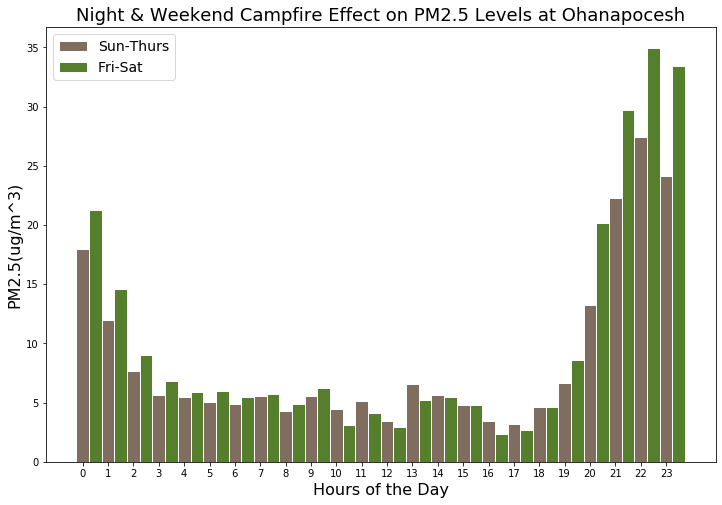

In [4]:
############################ Create a barplot showing how PM2.5 varies by hour of the day ################################

#http://python-graph-gallery.com/11-grouped-barplot/
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Group PM2.5 readings by hour, day, etc. for whole dataset
df_hour = pd.DataFrame(df.groupby(['hour'], as_index=False).mean())
weekday = df[(df['day']<4) | (df['day']>5)] 
weekday_hour = pd.DataFrame(weekday.groupby(['hour'], as_index=False).mean())

weekend = df[((df['day']<6) & (df['day']>3))]                  
weekend_hour = pd.DataFrame(weekend.groupby(['hour'], as_index=False).mean())

plt.figure(figsize=(12,8))

# set width of bar
barWidth = 0.5
 
# set height of bar
bars1 = weekday_hour['pm25']
bars2 = weekend_hour['pm25']


# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
# r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='Sun-Thurs')
plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='Fri-Sat')

# Add xticks on the middle of the group bars
plt.title("Night & Weekend Campfire Effect on PM2.5 Levels at Ohanapocesh",fontsize=18)
plt.xlabel('Hours of the Day',fontsize=16)
plt.ylabel('PM2.5(ug/m^3)',fontsize=16)
plt.xticks([r for r in range(len(bars1))], # r+barWidth to have tick show under the other paired bar
                                                    ['0','1','2','3','4','5','6','7',
                                                   '8','9','10','11','12','13','14','15',
                                                    '16','17','18','19','20','21','22','23']) 
# Create legend & Show graphic
plt.legend(fontsize=14)
plt.show()

#### We want a dataset which only includes hours from 9pm-1am averaged each day to get a "nightly" PM2.5 concentration
#### Group records by day, but include midnight of the next day with the previous day. Also, exclude morning and daytime hours)

In [103]:
############ Create new dataframe called "night" which only contains nighttime hours (from 9pm until 1am) ####################
night = df[(df['hour']<1)|(df['hour']>=20)]
night

############################# Subtract 1 day from days where the hour equals 0 or 1 ######################################
########################### This leaves all data capable of being grouped by the date ########################################
for index, row in night.iterrows():
    if night.loc[index,'hour'] <1:
        night.loc[index,'date'] = night.loc[index,'date'] - datetime.timedelta(days=1)

night
########## Drop the time from the timestamp leaving only date behind #################################
######################### so that dates can be grouped ##############################################
night['date'] = night['date'].dt.floor('d')
night

############################ Group all days by date ##############################################
night = pd.DataFrame(night.groupby(['date'], as_index=False).mean())
night

C:\Users\sph0088\Anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\Users\sph0088\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,date,year,month,day,hour,pm25,RELHUMID,AIRTEMP_F,WS_ms,MIXDEPTH_m,SUN_FLUX,RAINFALL,PRESSURE
0,2009-07-31,2009.0,8.0,5.0,0.0,60.000000,67.50,65.210,1.155025,47.70,0.00,0.0,876.60
1,2009-08-01,2009.0,8.0,5.2,17.2,28.200000,46.06,69.782,1.634343,148.98,31.96,0.0,875.64
2,2009-08-02,2009.0,8.0,4.8,17.2,21.800000,68.06,64.670,2.163423,286.60,28.26,0.0,874.74
3,2009-08-03,2009.0,8.0,0.2,17.2,11.200000,54.48,60.170,2.073590,236.96,28.60,0.0,875.20
4,2009-08-04,2009.0,8.0,1.2,17.2,9.600000,64.30,55.454,1.965897,125.70,27.06,0.0,877.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...
254,2020-07-30,2020.0,7.0,3.2,17.2,28.647767,47.58,68.414,0.649152,49.44,21.36,0.0,867.10
255,2020-07-31,2020.0,7.2,4.2,17.2,4.682533,79.18,60.314,2.773700,294.96,20.64,0.0,868.56
256,2020-08-01,2020.0,8.0,5.2,17.2,28.857033,83.26,57.110,2.205655,252.52,17.54,0.0,868.76
257,2020-08-02,2020.0,8.0,4.8,17.2,17.986667,79.66,56.750,3.129232,393.34,16.36,0.0,869.26


#### Create time-lagged afternoon variables to use as predictors in the model

In [104]:
#################### Create afternoon variables, afternoon PM from 1pm-5pm ##################################
df2 = df[(df['hour']>=13)&(df['hour']<=16)] 

########## Drop the time from the timestamp leaving only date behind #################################
######################### so that dates can be grouped ##############################################
df2['date'] = df2['date'].dt.floor('d')


########### Groupby date to get new variables #################################################
df2 = pd.DataFrame(df2.groupby(['date'], as_index=False).mean())
df2 = df2[['date','pm25','AIRTEMP_F','RELHUMID','SUN_FLUX','MIXDEPTH_m','RAINFALL']]
df2.columns = ['date','pm25_day','AT_day','RH_day','SF_day','MD_day','RF_day'] #Change column names
# # df2['date'] =  pd.to_datetime(df2['date'], format='%Y/%m/%d') #Convert all dates to datetime format
df2

C:\Users\sph0088\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,date,pm25_day,AT_day,RH_day,SF_day,MD_day,RF_day
0,2009-08-01,13.250000,82.580,27.800,850.900,891.675,0.00
1,2009-08-02,11.750000,81.320,27.975,857.600,1454.100,0.00
2,2009-08-03,8.000000,73.085,42.950,859.475,735.625,0.00
3,2009-08-04,7.750000,71.555,39.775,832.350,570.700,0.00
4,2009-08-05,14.500000,68.180,45.300,912.200,634.450,0.00
...,...,...,...,...,...,...,...
255,2020-07-31,5.967500,87.440,54.625,803.225,770.400,0.00
256,2020-08-01,4.717500,81.185,72.425,504.850,747.350,0.00
257,2020-08-02,0.318483,82.175,61.250,786.500,1052.925,0.00
258,2020-08-03,3.809417,63.905,88.725,256.225,701.975,0.05


In [105]:
#################### #Merge df2 --> new variables, with night for complete set ###############################
night = night.merge(df2, on='date')
night

#Create difference between afternoon high temperature and nightly average
night['AT_diff'] = night['AT_day'] - night['AIRTEMP_F']
night['MD_diff'] = night['MD_day'] - night['MIXDEPTH_m']
night.columns

Index(['date', 'year', 'month', 'day', 'hour', 'pm25', 'RELHUMID', 'AIRTEMP_F',
       'WS_ms', 'MIXDEPTH_m', 'SUN_FLUX', 'RAINFALL', 'PRESSURE', 'pm25_day',
       'AT_day', 'RH_day', 'SF_day', 'MD_day', 'RF_day', 'AT_diff', 'MD_diff'],
      dtype='object')

In [106]:
# night.sort_values(by=['pm25'])


night = night[['date', 'year', 'month', 'day', 'hour', 'pm25','pm25_day', 'RELHUMID','RH_day', 'AIRTEMP_F','AT_day','AT_diff',
       'WS_ms', 'MIXDEPTH_m','MD_day','MD_diff','SUN_FLUX','SF_day', 'RAINFALL','RF_day', 'PRESSURE']]


##################### Creates a new column with only weekday number ##############################
night['day'] = pd.DatetimeIndex(night['date']).dayofweek
night['month']= pd.DatetimeIndex(night['date']).month
night
# night.to_csv(r'C:\Users\sph0088\OneDrive - UNT System\MORA\Analysis\ohana_nightly_2009-2020.csv', index=False)

#### Create time-lagged PM2.5 variable from Previous Day and then export all data as csv in the last cell

In [107]:
df = pd.read_csv(r'C:\Users\sph0088\OneDrive - UNT System\MORA\Analysis\ohana_nightly_2009-2020.csv')
#Convert all dates to datetime format
df['date'] =  pd.to_datetime(df['date'], format='%Y/%m/%d')

prev_day = df[['date','pm25']]

#Convert all dates to datetime format
prev_day['date'] =  pd.to_datetime(prev_day['date'], format='%m/%d/%Y')

#Subtract 1 day from each day
for index, row in prev_day.iterrows():
    prev_day.loc[index,'date'] = prev_day.loc[index,'date'] + datetime.timedelta(days=1)

prev_day.columns = ['date', 'pm25_prev_day']
prev_day

df = df.merge(prev_day, on='date')
df = df[['date', 'year', 'month', 'day', 'hour', 'pm25','pm25_day','pm25_prev_day', 'RELHUMID','RH_day', 'AIRTEMP_F','AT_day','AT_diff',
       'WS_ms', 'MIXDEPTH_m','MD_day','MD_diff','SUN_FLUX','SF_day', 'RAINFALL','RF_day', 'PRESSURE']]

# df.to_csv(r'C:\Users\sph0088\OneDrive - UNT System\MORA\Analysis\ohana_nightly_2009-2020.csv',index=False)

C:\Users\sph0088\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\sph0088\Anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [109]:
df = pd.read_csv(r'C:\Users\sph0088\OneDrive - UNT System\MORA\Analysis\ohana_nightly_2009-2020.csv')
df['date'] =  pd.to_datetime(df['date'], format='%Y/%m/%d')


clouds = pd.read_csv(r'C:\Users\sph0088\OneDrive - UNT System\MORA\Analysis\ohana_nightly_alldata2.csv')
clouds = clouds[['date','clouds_20','rain_2hrs','yak_pm25','OMC','wildfires','Fire']]
clouds['date'] =  pd.to_datetime(clouds['date'], format='%Y/%m/%d')

merge = df.merge(clouds, on='date',how='left')

merge.to_csv(r'C:\Users\sph0088\OneDrive - UNT System\MORA\Analysis\ohana_nightly_alldata_2009-2020_.csv',index=False)